In [1]:
# Make all numpy available via shorter 'np' prefix
import numpy as np

# matplotlib library
import matplotlib.pyplot as plt

import pandas as pd


In [2]:
df = pd.read_csv('weatherHistory.csv')
df.head()

,Temperature (C),Apparent Temperature (C),Humidity
0,9.472222,7.388889,0.89
1,9.355556,7.227778,0.86
2,9.377778,9.377778,0.89
3,8.288889,5.944444,0.83
4,8.755556,6.977778,0.83


# Using DataFrame.describe() method

In [3]:
describe = df.describe()
print(describe)

       Temperature (C)  Apparent Temperature (C)      Humidity
count     96453.000000              96453.000000  96453.000000
mean         11.932678                 10.855029      0.734899
std           9.551546                 10.696847      0.195473
min         -21.822222                -27.716667      0.000000
25%           4.688889                  2.311111      0.600000
50%          12.000000                 12.000000      0.780000
75%          18.838889                 18.838889      0.890000
max          39.905556                 39.344444      1.000000


# find mean of "humidity" coulmn

In [4]:
 meanHumidity = df["Humidity"].mean()
print(meanHumidity)

0.7348989663358906


# Find the mean ignoring NaN values using DataFrame.mean()

In [5]:
meanIgnorNoneValu = df.mean(axis = 0, skipna = False)
print(meanIgnorNoneValu)

Temperature (C)             11.932678
Apparent Temperature (C)    10.855029
Humidity                     0.734899
dtype: float64


# Using multiple columns mean using DataFrame.mean()

In [6]:
meanMultiColumn = df[["Temperature (C)","Humidity"]].mean()
meanMultiColumn

Temperature (C)    11.932678
Humidity            0.734899
dtype: float64

In [7]:
from scipy import stats
TrimmedMean = stats.trim_mean(df[["Temperature (C)","Humidity"]], proportiontocut = 0.25, axis=0)
TrimmedMean

array([11.73797435,  0.77292139])

In [8]:
# Import statistics Library
import statistics
MedianValu = statistics.median(df["Temperature (C)"])
MedianValu

12.0

In [9]:
weighted_average = np.average(a=df["Temperature (C)"], weights=df["Humidity"])
print(weighted_average)

10.326403826813646


In [10]:
#!pip install weightedstats

In [11]:
import weightedstats as ws
WeightedMedianValu = ws.weighted_median(df["Temperature (C)"], df["Temperature (C)"])
WeightedMedianValu

18.90555556

In [12]:
import math
variance = df["Temperature (C)"].var()
print("variance : " , variance)
standarDeviation1 = np.std(df["Temperature (C)"])
standarDeviation2 = math.sqrt(variance)
print("standarer deviation by function : ", standarDeviation1) 
print("standarer deviation with caculat : ", standarDeviation1) 

variance :  91.2320371156198
standarer deviation by function :  9.551496806533821
standarer deviation with caculat :  9.551496806533821


# Calculate a Pandas Weighted Average Using Numpy

In [13]:
import pandas as pd
import numpy as np
weighted_average = np.average(a=df["Temperature (C)"], weights=df["Humidity"])
print(weighted_average)

10.326403826813646


In [14]:
rangeForCloumn = np.ptp(df["Temperature (C)"])
print(rangeForCloumn)

61.727777780000004


# Compute the q-th percentile of the data along the specified axis.

In [15]:
percentile1 = np.percentile(df["Temperature (C)"] , q = 50)
print("percentil in 50% : ",percentile1)
percentile75 , percentile25 = np.percentile(df["Temperature (C)"] , q = [75 ,25])
print("percentil in 75% : ",percentile75,"\npercentil in 50% : ",percentile25)

percentil in 50% :  12.0
percentil in 75% :  18.83888889 
percentil in 50% :  4.688888888999999


In [16]:
IQR = percentile75 - percentile25
print("The interquartile range : ",IQR)

The interquartile range :  14.150000001


# calculat the " Median Absolution Deviation MAD"

In [17]:
MedianValu = statistics.median(df["Temperature (C)"])
print("Madian valu : ", MedianValu)
MAD = statistics.median([abs(i-MedianValu) for i in df["Temperature (C)"] ])
print("Median Absolution Deviation MAD : ",MAD)

Madian valu :  12.0
Median Absolution Deviation MAD :  7.016666667


mini :  -2.766666667 
q1 :  4.688888888999999 
q2 :  12.0  
q3 :  18.83888889 
max :  27.77777778
Box plot


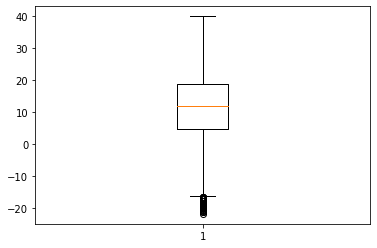

frequancy table :  col_0            no_of_Temperature
Temperature (C)                   
-21.822222                       1
-21.111111                       3
-20.783333                       1
-20.555556                       2
-20.277778                       1
...                            ...
 38.861111                       1
 38.866667                       1
 38.983333                       3
 39.588889                       1
 39.905556                       1

[7574 rows x 1 columns]
Histograms


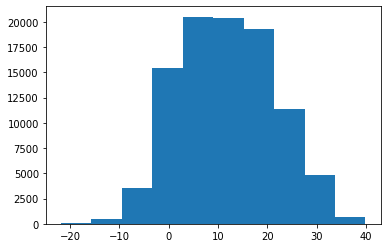

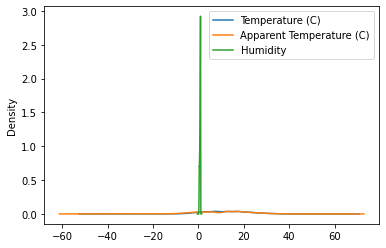

In [18]:
pmin , q1,q2,q3,pmax = np.percentile(df["Temperature (C)"] , q = [5 ,25,50,75,95])
print("mini : " , pmin ,"\nq1 : ",q1,"\nq2 : ",q2," \nq3 : ",q3,"\nmax : ",pmax)


import matplotlib.pyplot as plt
plt.boxplot(df["Temperature (C)"]  )
print("Box plot")
plt.show()
frequancyTable = pd.crosstab(df["Temperature (C)"],'no_of_Temperature')
print("frequancy table : ", frequancyTable)
# frequancy table tell us How many mentioned value in the table??!
print("Histograms")
plt.hist(df["Temperature (C)"])
pd.DataFrame(df).plot(kind='density')
plt.show()


# The mode of a set of data values is the value that appears most often.

In [19]:
modeValue = statistics.mode(df["Temperature (C)"])
print("mode value : ",modeValue)

mode value :  7.222222222


In [20]:
df = pd.read_csv('weatherHistory.csv')
df.head()

,Temperature (C),Apparent Temperature (C),Humidity
0,9.472222,7.388889,0.89
1,9.355556,7.227778,0.86
2,9.377778,9.377778,0.89
3,8.288889,5.944444,0.83
4,8.755556,6.977778,0.83


# correlation matrix

In [21]:
matrix = df.corr()
print("correlation matrex : \n", matrix)

correlation matrex : 
                           Temperature (C)  Apparent Temperature (C)  Humidity
Temperature (C)                  1.000000                  0.992629 -0.632255
Apparent Temperature (C)         0.992629                  1.000000 -0.602571
Humidity                        -0.632255                 -0.602571  1.000000


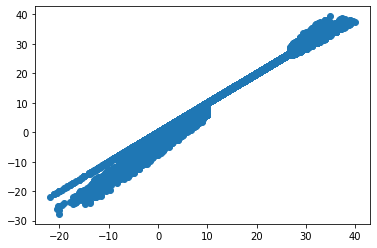

In [22]:
plt.scatter(df["Temperature (C)"],df["Apparent Temperature (C)"])

# correlation coefficient

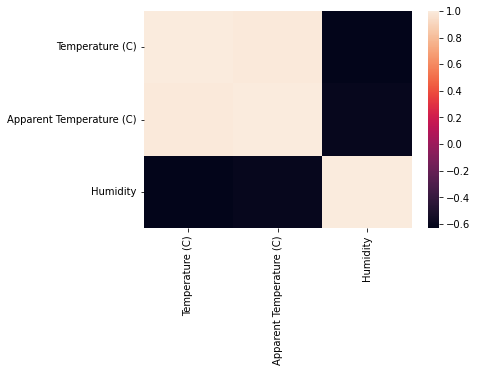

In [23]:
import seaborn as sns
sns.heatmap(df.corr())
plt.show()

# hexagonal binning

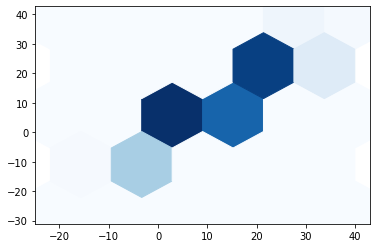

In [24]:
plt.hexbin(df["Temperature (C)"], df["Apparent Temperature (C)"], gridsize = 5, cmap ='Blues') 

# violin plots

<AxesSubplot:>

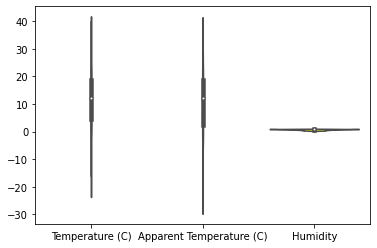

In [25]:
sns.violinplot(data = df , color = "Yellow")

# EX:.
# a fair coin ==> p(0)=p(1)=0.5
# assum Head = 1 && Tail = 0
# probability of Head == ?

In [26]:
x = np.random.randint(0,2,size = 9)
print(x)
y = x == 1
np.sum(y)

[1 1 1 0 1 1 1 0 0]


6

n =  10  , p(H) =  0.5
--------------------------------
n =  110  , p(H) =  0.5181818181818182
--------------------------------
n =  210  , p(H) =  0.5190476190476191
--------------------------------
n =  310  , p(H) =  0.5225806451612903
--------------------------------
n =  410  , p(H) =  0.4975609756097561
--------------------------------
n =  510  , p(H) =  0.49411764705882355
--------------------------------
n =  610  , p(H) =  0.4852459016393443
--------------------------------
n =  710  , p(H) =  0.5126760563380282
--------------------------------
n =  810  , p(H) =  0.5308641975308642
--------------------------------
n =  910  , p(H) =  0.5032967032967033
--------------------------------
n =  1010  , p(H) =  0.4792079207920792
--------------------------------
n =  1110  , p(H) =  0.4810810810810811
--------------------------------
n =  1210  , p(H) =  0.5057851239669422
--------------------------------
n =  1310  , p(H) =  0.5015267175572519
--------------------------------
n =

n =  21610  , p(H) =  0.4982415548357242
--------------------------------
n =  21710  , p(H) =  0.49884845693228924
--------------------------------
n =  21810  , p(H) =  0.5022008253094911
--------------------------------
n =  21910  , p(H) =  0.5018712916476494
--------------------------------
n =  22010  , p(H) =  0.501908223534757
--------------------------------
n =  22110  , p(H) =  0.5008593396653098
--------------------------------
n =  22210  , p(H) =  0.5011706438541198
--------------------------------
n =  22310  , p(H) =  0.5042133572389064
--------------------------------
n =  22410  , p(H) =  0.4959839357429719
--------------------------------
n =  22510  , p(H) =  0.4991115059973345
--------------------------------
n =  22610  , p(H) =  0.5015479876160991
--------------------------------
n =  22710  , p(H) =  0.5022016732716865
--------------------------------
n =  22810  , p(H) =  0.5008329679964928
--------------------------------
n =  22910  , p(H) =  0.50580532518550

n =  37210  , p(H) =  0.4984681537221177
--------------------------------
n =  37310  , p(H) =  0.4951219512195122
--------------------------------
n =  37410  , p(H) =  0.5011761561079925
--------------------------------
n =  37510  , p(H) =  0.5026392961876833
--------------------------------
n =  37610  , p(H) =  0.49449614464238234
--------------------------------
n =  37710  , p(H) =  0.5011933174224343
--------------------------------
n =  37810  , p(H) =  0.49801639777836554
--------------------------------
n =  37910  , p(H) =  0.5071221313637563
--------------------------------
n =  38010  , p(H) =  0.5043935806366746
--------------------------------
n =  38110  , p(H) =  0.5000787194961952
--------------------------------
n =  38210  , p(H) =  0.49874378434964667
--------------------------------
n =  38310  , p(H) =  0.5007308796658836
--------------------------------
n =  38410  , p(H) =  0.5009112210361885
--------------------------------
n =  38510  , p(H) =  0.50041547649

n =  49110  , p(H) =  0.5015882712278559
--------------------------------
n =  49210  , p(H) =  0.5021743548059338
--------------------------------
n =  49310  , p(H) =  0.503265057797607
--------------------------------
n =  49410  , p(H) =  0.4969439384739931
--------------------------------
n =  49510  , p(H) =  0.49721268430620075
--------------------------------
n =  49610  , p(H) =  0.4975408183833904
--------------------------------
n =  49710  , p(H) =  0.49764634882317443
--------------------------------
n =  49810  , p(H) =  0.5020678578598675
--------------------------------
n =  49910  , p(H) =  0.4971348427168904
--------------------------------
n =  50010  , p(H) =  0.49536092781443714
--------------------------------
n =  50110  , p(H) =  0.4967671123528238
--------------------------------
n =  50210  , p(H) =  0.4992431786496714
--------------------------------
n =  50310  , p(H) =  0.5019479228781555
--------------------------------
n =  50410  , p(H) =  0.495239039873

n =  66310  , p(H) =  0.5027899261046599
--------------------------------
n =  66410  , p(H) =  0.5007077247402499
--------------------------------
n =  66510  , p(H) =  0.5008119079837619
--------------------------------
n =  66610  , p(H) =  0.4984837111544813
--------------------------------
n =  66710  , p(H) =  0.497691500524659
--------------------------------
n =  66810  , p(H) =  0.49812902260140696
--------------------------------
n =  66910  , p(H) =  0.4957256015543267
--------------------------------
n =  67010  , p(H) =  0.4997164602298165
--------------------------------
n =  67110  , p(H) =  0.5018775145283862
--------------------------------
n =  67210  , p(H) =  0.4987799434607945
--------------------------------
n =  67310  , p(H) =  0.5008913980092111
--------------------------------
n =  67410  , p(H) =  0.4985017059783415
--------------------------------
n =  67510  , p(H) =  0.502192267812176
--------------------------------
n =  67610  , p(H) =  0.497722230439284

n =  78610  , p(H) =  0.49629818089301614
--------------------------------
n =  78710  , p(H) =  0.5003430313810189
--------------------------------
n =  78810  , p(H) =  0.49903565537368355
--------------------------------
n =  78910  , p(H) =  0.5028260043087062
--------------------------------
n =  79010  , p(H) =  0.49997468674851286
--------------------------------
n =  79110  , p(H) =  0.49657439008974846
--------------------------------
n =  79210  , p(H) =  0.5013887135462695
--------------------------------
n =  79310  , p(H) =  0.4996469549867608
--------------------------------
n =  79410  , p(H) =  0.5005037148973681
--------------------------------
n =  79510  , p(H) =  0.5012702804678657
--------------------------------
n =  79610  , p(H) =  0.5002261022484612
--------------------------------
n =  79710  , p(H) =  0.5013549115543846
--------------------------------
n =  79810  , p(H) =  0.5007016664578373
--------------------------------
n =  79910  , p(H) =  0.4995995494

n =  90810  , p(H) =  0.4997136879198326
--------------------------------
n =  90910  , p(H) =  0.5021009789902101
--------------------------------
n =  91010  , p(H) =  0.4997472805186243
--------------------------------
n =  91110  , p(H) =  0.5009658654373834
--------------------------------
n =  91210  , p(H) =  0.4984650805832694
--------------------------------
n =  91310  , p(H) =  0.49878436096813056
--------------------------------
n =  91410  , p(H) =  0.49821682529263756
--------------------------------
n =  91510  , p(H) =  0.4986777401376899
--------------------------------
n =  91610  , p(H) =  0.4978168322235564
--------------------------------
n =  91710  , p(H) =  0.5015810707665467
--------------------------------
n =  91810  , p(H) =  0.5014050756998149
--------------------------------
n =  91910  , p(H) =  0.5047111304537047
--------------------------------
n =  92010  , p(H) =  0.5015107053581133
--------------------------------
n =  92110  , p(H) =  0.497578981652

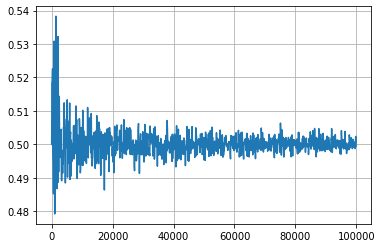

In [27]:
narr =[]
parr = []
i = 10
for i in range(10 ,100000, i**2):
    x = np.random.randint(0,2,size = i)
    y = x == 1
    p = np.sum(y) /i
    parr.append(p)
    narr.append(i)
    print("n = " , i , " , p(H) = " ,p)
    print("--------------------------------")
    
plt.plot(narr , parr)
plt.grid()
plt.show()
    

# Rolling one die "fair" , Find P(5)


n =  10  , p(5) =  0.4
--------------------------------
n =  110  , p(5) =  0.19090909090909092
--------------------------------
n =  210  , p(5) =  0.18571428571428572
--------------------------------
n =  310  , p(5) =  0.16129032258064516
--------------------------------
n =  410  , p(5) =  0.15853658536585366
--------------------------------
n =  510  , p(5) =  0.1627450980392157
--------------------------------
n =  610  , p(5) =  0.15901639344262294
--------------------------------
n =  710  , p(5) =  0.16619718309859155
--------------------------------
n =  810  , p(5) =  0.14074074074074075
--------------------------------
n =  910  , p(5) =  0.16043956043956045
--------------------------------
n =  1010  , p(5) =  0.16930693069306932
--------------------------------
n =  1110  , p(5) =  0.14684684684684685
--------------------------------
n =  1210  , p(5) =  0.16363636363636364
--------------------------------
n =  1310  , p(5) =  0.1687022900763359
--------------------------

n =  20410  , p(5) =  0.16878980891719744
--------------------------------
n =  20510  , p(5) =  0.16274987810823988
--------------------------------
n =  20610  , p(5) =  0.1671033478893741
--------------------------------
n =  20710  , p(5) =  0.17040077257363592
--------------------------------
n =  20810  , p(5) =  0.16665064872657376
--------------------------------
n =  20910  , p(5) =  0.16504065040650406
--------------------------------
n =  21010  , p(5) =  0.16539742979533556
--------------------------------
n =  21110  , p(5) =  0.16996684036001894
--------------------------------
n =  21210  , p(5) =  0.16765676567656765
--------------------------------
n =  21310  , p(5) =  0.1659314875645237
--------------------------------
n =  21410  , p(5) =  0.1619803829985988
--------------------------------
n =  21510  , p(5) =  0.1686192468619247
--------------------------------
n =  21610  , p(5) =  0.16260990282276724
--------------------------------
n =  21710  , p(5) =  0.16688

n =  34810  , p(5) =  0.16569951163458776
--------------------------------
n =  34910  , p(5) =  0.16430822114007448
--------------------------------
n =  35010  , p(5) =  0.16452442159383032
--------------------------------
n =  35110  , p(5) =  0.16360011392765594
--------------------------------
n =  35210  , p(5) =  0.16469752911104799
--------------------------------
n =  35310  , p(5) =  0.1661002548853016
--------------------------------
n =  35410  , p(5) =  0.16229878565377012
--------------------------------
n =  35510  , p(5) =  0.16699521261616446
--------------------------------
n =  35610  , p(5) =  0.16588037068239259
--------------------------------
n =  35710  , p(5) =  0.1636516381965836
--------------------------------
n =  35810  , p(5) =  0.16556827701759286
--------------------------------
n =  35910  , p(5) =  0.16560846560846562
--------------------------------
n =  36010  , p(5) =  0.16609275201332963
--------------------------------
n =  36110  , p(5) =  0.166

n =  50710  , p(5) =  0.16671267994478406
--------------------------------
n =  50810  , p(5) =  0.16725054123204094
--------------------------------
n =  50910  , p(5) =  0.16643095659006088
--------------------------------
n =  51010  , p(5) =  0.16798666928053324
--------------------------------
n =  51110  , p(5) =  0.1667188417139503
--------------------------------
n =  51210  , p(5) =  0.16658855692247607
--------------------------------
n =  51310  , p(5) =  0.16509452348470083
--------------------------------
n =  51410  , p(5) =  0.16525967710562148
--------------------------------
n =  51510  , p(5) =  0.16711318190642593
--------------------------------
n =  51610  , p(5) =  0.16744816895950398
--------------------------------
n =  51710  , p(5) =  0.16776252175594664
--------------------------------
n =  51810  , p(5) =  0.16657016020073345
--------------------------------
n =  51910  , p(5) =  0.16570988248892313
--------------------------------
n =  52010  , p(5) =  0.16

n =  65310  , p(5) =  0.16891747052518757
--------------------------------
n =  65410  , p(5) =  0.16769607093716557
--------------------------------
n =  65510  , p(5) =  0.16744008548313236
--------------------------------
n =  65610  , p(5) =  0.16873952141441853
--------------------------------
n =  65710  , p(5) =  0.16403895906254756
--------------------------------
n =  65810  , p(5) =  0.16740616927518615
--------------------------------
n =  65910  , p(5) =  0.16584736762251556
--------------------------------
n =  66010  , p(5) =  0.16674746250568095
--------------------------------
n =  66110  , p(5) =  0.16581455150506733
--------------------------------
n =  66210  , p(5) =  0.16483914816492976
--------------------------------
n =  66310  , p(5) =  0.16535967425727643
--------------------------------
n =  66410  , p(5) =  0.16514079204939014
--------------------------------
n =  66510  , p(5) =  0.1682153059690272
--------------------------------
n =  66610  , p(5) =  0.16

n =  81310  , p(5) =  0.16857705079326035
--------------------------------
n =  81410  , p(5) =  0.16511485075543544
--------------------------------
n =  81510  , p(5) =  0.16537848116795484
--------------------------------
n =  81610  , p(5) =  0.16517583629457175
--------------------------------
n =  81710  , p(5) =  0.1669563088973198
--------------------------------
n =  81810  , p(5) =  0.16550543943283216
--------------------------------
n =  81910  , p(5) =  0.16851422292760346
--------------------------------
n =  82010  , p(5) =  0.16774783562980125
--------------------------------
n =  82110  , p(5) =  0.16846912678114725
--------------------------------
n =  82210  , p(5) =  0.1669869845517577
--------------------------------
n =  82310  , p(5) =  0.16479164135584984
--------------------------------
n =  82410  , p(5) =  0.16760101929377502
--------------------------------
n =  82510  , p(5) =  0.16824627317900862
--------------------------------
n =  82610  , p(5) =  0.166

n =  96410  , p(5) =  0.16899699201327664
--------------------------------
n =  96510  , p(5) =  0.16803440058025076
--------------------------------
n =  96610  , p(5) =  0.16701169651174827
--------------------------------
n =  96710  , p(5) =  0.16629097301209803
--------------------------------
n =  96810  , p(5) =  0.16710050614605929
--------------------------------
n =  96910  , p(5) =  0.16617480136208854
--------------------------------
n =  97010  , p(5) =  0.1671889495928255
--------------------------------
n =  97110  , p(5) =  0.16779940273916177
--------------------------------
n =  97210  , p(5) =  0.16760621335253575
--------------------------------
n =  97310  , p(5) =  0.16543006885212208
--------------------------------
n =  97410  , p(5) =  0.16774458474489273
--------------------------------
n =  97510  , p(5) =  0.167264895908112
--------------------------------
n =  97610  , p(5) =  0.16895809855547586
--------------------------------
n =  97710  , p(5) =  0.1687

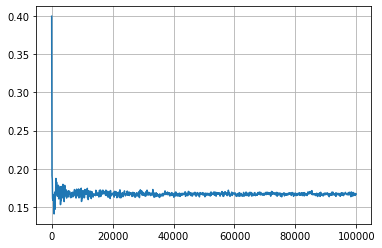

In [28]:
narr =[]
parr = []
i = 10
for i in range(10 ,100000, i**2):
    x = np.random.randint(1,7,size = i)
    y = x == 5
    p = np.sum(y) /i
    parr.append(p)
    narr.append(i)
    print("n = " , i , " , p(5) = " ,p)
    print("--------------------------------")
    
plt.plot(narr , parr)
plt.grid()
plt.show()

# Rolling one die "fair" , find P(X>3)

n =  10  , p(x>3) =  0.6
--------------------------------
n =  110  , p(x>3) =  0.5181818181818182
--------------------------------
n =  210  , p(x>3) =  0.4238095238095238
--------------------------------
n =  310  , p(x>3) =  0.4645161290322581
--------------------------------
n =  410  , p(x>3) =  0.5121951219512195
--------------------------------
n =  510  , p(x>3) =  0.5235294117647059
--------------------------------
n =  610  , p(x>3) =  0.49836065573770494
--------------------------------
n =  710  , p(x>3) =  0.47183098591549294
--------------------------------
n =  810  , p(x>3) =  0.49135802469135803
--------------------------------
n =  910  , p(x>3) =  0.5131868131868131
--------------------------------
n =  1010  , p(x>3) =  0.497029702970297
--------------------------------
n =  1110  , p(x>3) =  0.5
--------------------------------
n =  1210  , p(x>3) =  0.471900826446281
--------------------------------
n =  1310  , p(x>3) =  0.5068702290076336
-----------------------

n =  23810  , p(x>3) =  0.4982360352792944
--------------------------------
n =  23910  , p(x>3) =  0.5069845253032204
--------------------------------
n =  24010  , p(x>3) =  0.5032486463973345
--------------------------------
n =  24110  , p(x>3) =  0.4982994608046454
--------------------------------
n =  24210  , p(x>3) =  0.5003304419661297
--------------------------------
n =  24310  , p(x>3) =  0.4986013986013986
--------------------------------
n =  24410  , p(x>3) =  0.4976648914379353
--------------------------------
n =  24510  , p(x>3) =  0.5008159934720522
--------------------------------
n =  24610  , p(x>3) =  0.5004469727752946
--------------------------------
n =  24710  , p(x>3) =  0.4949817887494941
--------------------------------
n =  24810  , p(x>3) =  0.49895203546956873
--------------------------------
n =  24910  , p(x>3) =  0.5020473705339221
--------------------------------
n =  25010  , p(x>3) =  0.5017193122750899
--------------------------------
n =  25110 

n =  40410  , p(x>3) =  0.4981440237564959
--------------------------------
n =  40510  , p(x>3) =  0.5006418168353493
--------------------------------
n =  40610  , p(x>3) =  0.5064023639497661
--------------------------------
n =  40710  , p(x>3) =  0.49887005649717514
--------------------------------
n =  40810  , p(x>3) =  0.4984807645185004
--------------------------------
n =  40910  , p(x>3) =  0.5010266438523588
--------------------------------
n =  41010  , p(x>3) =  0.5030724213606438
--------------------------------
n =  41110  , p(x>3) =  0.49807832644125516
--------------------------------
n =  41210  , p(x>3) =  0.5010677020140742
--------------------------------
n =  41310  , p(x>3) =  0.49818445896877267
--------------------------------
n =  41410  , p(x>3) =  0.4970538517266361
--------------------------------
n =  41510  , p(x>3) =  0.4974463984582028
--------------------------------
n =  41610  , p(x>3) =  0.5006008171112714
--------------------------------
n =  4171

n =  53910  , p(x>3) =  0.49782971619365607
--------------------------------
n =  54010  , p(x>3) =  0.503795593408628
--------------------------------
n =  54110  , p(x>3) =  0.496784328220292
--------------------------------
n =  54210  , p(x>3) =  0.49765725880833794
--------------------------------
n =  54310  , p(x>3) =  0.5038482784017676
--------------------------------
n =  54410  , p(x>3) =  0.4959382466458372
--------------------------------
n =  54510  , p(x>3) =  0.5004035956705192
--------------------------------
n =  54610  , p(x>3) =  0.4958981871452115
--------------------------------
n =  54710  , p(x>3) =  0.4966368122829464
--------------------------------
n =  54810  , p(x>3) =  0.500018244845831
--------------------------------
n =  54910  , p(x>3) =  0.49936259333454747
--------------------------------
n =  55010  , p(x>3) =  0.4981639701872387
--------------------------------
n =  55110  , p(x>3) =  0.4996007984031936
--------------------------------
n =  55210  

n =  69210  , p(x>3) =  0.4986129172084959
--------------------------------
n =  69310  , p(x>3) =  0.49744625595152214
--------------------------------
n =  69410  , p(x>3) =  0.49919319982711424
--------------------------------
n =  69510  , p(x>3) =  0.5018414616601928
--------------------------------
n =  69610  , p(x>3) =  0.49844849877891106
--------------------------------
n =  69710  , p(x>3) =  0.4984937598622866
--------------------------------
n =  69810  , p(x>3) =  0.49852456668099127
--------------------------------
n =  69910  , p(x>3) =  0.5000143041052783
--------------------------------
n =  70010  , p(x>3) =  0.5008141694043708
--------------------------------
n =  70110  , p(x>3) =  0.49747539580658967
--------------------------------
n =  70210  , p(x>3) =  0.4993163367041732
--------------------------------
n =  70310  , p(x>3) =  0.5008960318589105
--------------------------------
n =  70410  , p(x>3) =  0.4981536713535009
--------------------------------
n =  70

n =  84910  , p(x>3) =  0.49981156518666825
--------------------------------
n =  85010  , p(x>3) =  0.5012469121279849
--------------------------------
n =  85110  , p(x>3) =  0.5009399600516978
--------------------------------
n =  85210  , p(x>3) =  0.5032977350076282
--------------------------------
n =  85310  , p(x>3) =  0.49985933653733444
--------------------------------
n =  85410  , p(x>3) =  0.49870038637161923
--------------------------------
n =  85510  , p(x>3) =  0.5003976143141153
--------------------------------
n =  85610  , p(x>3) =  0.4972433126971148
--------------------------------
n =  85710  , p(x>3) =  0.4989732819974332
--------------------------------
n =  85810  , p(x>3) =  0.4990910150332129
--------------------------------
n =  85910  , p(x>3) =  0.49934815504597835
--------------------------------
n =  86010  , p(x>3) =  0.4980816184164632
--------------------------------
n =  86110  , p(x>3) =  0.4971315758913018
--------------------------------
n =  862

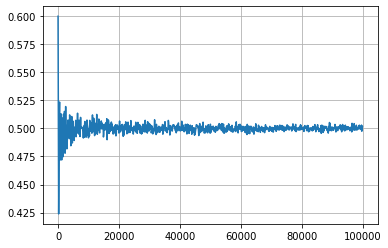

In [29]:
narr =[]
parr = []
i = 10
for i in range(10 ,100000, i**2):
    x = np.random.randint(1,7,size = i)
    y = x > 3
    p = np.sum(y) /i
    parr.append(p)
    narr.append(i)
    print("n = " , i , " , p(x>3) = " ,p)
    print("--------------------------------")
    
plt.plot(narr , parr)
plt.grid()
plt.show()

# Rolling two fair dice , p(5) ==>??


In [30]:
x = np.random.randint(1,7,size = (10,2))
print(x)
y = np.sum(x , axis = 1, keepdims = True) == 5 
y

[[4 4]
 [3 1]
 [1 4]
 [3 1]
 [3 1]
 [2 3]
 [6 5]
 [3 4]
 [3 5]
 [3 2]]


array([[False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True]])

n =  10  , p(5) =  0.1
--------------------------------
n =  110  , p(5) =  0.12727272727272726
--------------------------------
n =  210  , p(5) =  0.12380952380952381
--------------------------------
n =  310  , p(5) =  0.09032258064516129
--------------------------------
n =  410  , p(5) =  0.11219512195121951
--------------------------------
n =  510  , p(5) =  0.11960784313725491
--------------------------------
n =  610  , p(5) =  0.10983606557377049
--------------------------------
n =  710  , p(5) =  0.1056338028169014
--------------------------------
n =  810  , p(5) =  0.09876543209876543
--------------------------------
n =  910  , p(5) =  0.1043956043956044
--------------------------------
n =  1010  , p(5) =  0.11386138613861387
--------------------------------
n =  1110  , p(5) =  0.11531531531531532
--------------------------------
n =  1210  , p(5) =  0.10578512396694215
--------------------------------
n =  1310  , p(5) =  0.11755725190839694
--------------------------

n =  13710  , p(5) =  0.1137126185266229
--------------------------------
n =  13810  , p(5) =  0.10941346850108617
--------------------------------
n =  13910  , p(5) =  0.11552839683680804
--------------------------------
n =  14010  , p(5) =  0.11142041399000714
--------------------------------
n =  14110  , p(5) =  0.11389085754783841
--------------------------------
n =  14210  , p(5) =  0.10942997888810696
--------------------------------
n =  14310  , p(5) =  0.11453529000698812
--------------------------------
n =  14410  , p(5) =  0.11297709923664122
--------------------------------
n =  14510  , p(5) =  0.1073053066850448
--------------------------------
n =  14610  , p(5) =  0.11143052703627652
--------------------------------
n =  14710  , p(5) =  0.11006118286879674
--------------------------------
n =  14810  , p(5) =  0.10796758946657664
--------------------------------
n =  14910  , p(5) =  0.11381623071763917
--------------------------------
n =  15010  , p(5) =  0.111

n =  28510  , p(5) =  0.10964573833742547
--------------------------------
n =  28610  , p(5) =  0.11038098566934638
--------------------------------
n =  28710  , p(5) =  0.11201671891327064
--------------------------------
n =  28810  , p(5) =  0.11322457480041652
--------------------------------
n =  28910  , p(5) =  0.11093047388446904
--------------------------------
n =  29010  , p(5) =  0.11175456739055498
--------------------------------
n =  29110  , p(5) =  0.11071796633459292
--------------------------------
n =  29210  , p(5) =  0.1109209174940089
--------------------------------
n =  29310  , p(5) =  0.10904128283862163
--------------------------------
n =  29410  , p(5) =  0.11037062223733424
--------------------------------
n =  29510  , p(5) =  0.11172483903761436
--------------------------------
n =  29610  , p(5) =  0.1093887200270179
--------------------------------
n =  29710  , p(5) =  0.10982834062605183
--------------------------------
n =  29810  , p(5) =  0.108

n =  43110  , p(5) =  0.11113430758524705
--------------------------------
n =  43210  , p(5) =  0.11055311270539227
--------------------------------
n =  43310  , p(5) =  0.11184483952897714
--------------------------------
n =  43410  , p(5) =  0.11218613222759732
--------------------------------
n =  43510  , p(5) =  0.11123879567915422
--------------------------------
n =  43610  , p(5) =  0.11027287319422151
--------------------------------
n =  43710  , p(5) =  0.11358956760466712
--------------------------------
n =  43810  , p(5) =  0.1090162063455832
--------------------------------
n =  43910  , p(5) =  0.11056706900478251
--------------------------------
n =  44010  , p(5) =  0.10874801181549648
--------------------------------
n =  44110  , p(5) =  0.10897755610972569
--------------------------------
n =  44210  , p(5) =  0.11115132323003846
--------------------------------
n =  44310  , p(5) =  0.10965921913789213
--------------------------------
n =  44410  , p(5) =  0.10

n =  56910  , p(5) =  0.1136004217185029
--------------------------------
n =  57010  , p(5) =  0.11317312752148746
--------------------------------
n =  57110  , p(5) =  0.11062861145158466
--------------------------------
n =  57210  , p(5) =  0.11012060828526482
--------------------------------
n =  57310  , p(5) =  0.11055662188099807
--------------------------------
n =  57410  , p(5) =  0.11257620623584741
--------------------------------
n =  57510  , p(5) =  0.11088506346722309
--------------------------------
n =  57610  , p(5) =  0.11185558062836314
--------------------------------
n =  57710  , p(5) =  0.11160977300294576
--------------------------------
n =  57810  , p(5) =  0.11160698841030964
--------------------------------
n =  57910  , p(5) =  0.10979105508547747
--------------------------------
n =  58010  , p(5) =  0.11175659369074298
--------------------------------
n =  58110  , p(5) =  0.11039408019273791
--------------------------------
n =  58210  , p(5) =  0.11

n =  69210  , p(5) =  0.11154457448345614
--------------------------------
n =  69310  , p(5) =  0.11213389121338913
--------------------------------
n =  69410  , p(5) =  0.11230370263650771
--------------------------------
n =  69510  , p(5) =  0.11189756869515177
--------------------------------
n =  69610  , p(5) =  0.11313029737106738
--------------------------------
n =  69710  , p(5) =  0.11272414287763592
--------------------------------
n =  69810  , p(5) =  0.11154562383612662
--------------------------------
n =  69910  , p(5) =  0.11144328422257188
--------------------------------
n =  70010  , p(5) =  0.11142693900871305
--------------------------------
n =  70110  , p(5) =  0.11306518328341178
--------------------------------
n =  70210  , p(5) =  0.10831790343255947
--------------------------------
n =  70310  , p(5) =  0.11170530507751386
--------------------------------
n =  70410  , p(5) =  0.10828007385314586
--------------------------------
n =  70510  , p(5) =  0.1

n =  83310  , p(5) =  0.11170327691753691
--------------------------------
n =  83410  , p(5) =  0.11081405107301283
--------------------------------
n =  83510  , p(5) =  0.1112920608310382
--------------------------------
n =  83610  , p(5) =  0.11155364190886258
--------------------------------
n =  83710  , p(5) =  0.10962847927368295
--------------------------------
n =  83810  , p(5) =  0.11245674740484429
--------------------------------
n =  83910  , p(5) =  0.10948635442736265
--------------------------------
n =  84010  , p(5) =  0.11293893584097131
--------------------------------
n =  84110  , p(5) =  0.11097372488408037
--------------------------------
n =  84210  , p(5) =  0.11255195344970906
--------------------------------
n =  84310  , p(5) =  0.1128928952674653
--------------------------------
n =  84410  , p(5) =  0.11082810093590807
--------------------------------
n =  84510  , p(5) =  0.11434149804756834
--------------------------------
n =  84610  , p(5) =  0.110

n =  95710  , p(5) =  0.1104691254832306
--------------------------------
n =  95810  , p(5) =  0.11151236822878614
--------------------------------
n =  95910  , p(5) =  0.1114169533938067
--------------------------------
n =  96010  , p(5) =  0.11210290594729716
--------------------------------
n =  96110  , p(5) =  0.11179898033503277
--------------------------------
n =  96210  , p(5) =  0.11183868620725497
--------------------------------
n =  96310  , p(5) =  0.11096459350015575
--------------------------------
n =  96410  , p(5) =  0.1113681153407323
--------------------------------
n =  96510  , p(5) =  0.11065174593306393
--------------------------------
n =  96610  , p(5) =  0.11159300279474174
--------------------------------
n =  96710  , p(5) =  0.1113845517526626
--------------------------------
n =  96810  , p(5) =  0.11142443962400578
--------------------------------
n =  96910  , p(5) =  0.11117531730471572
--------------------------------
n =  97010  , p(5) =  0.10999

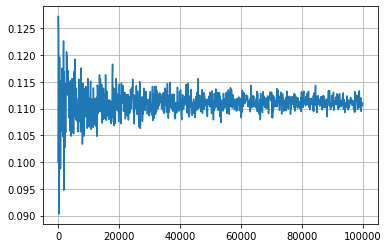

In [31]:

narr =[]
parr = []
i = 10
for i in range(10 , 100000 , i**2):
        x = np.random.randint(1,7,size = (i,2))

        y = np.sum(x , axis = 1, keepdims = True) == 5 
        p= np.sum(y)/i
        parr.append(p)
        narr.append(i)

        print("n = " , i , " , p(5) = " ,p)
        print("--------------------------------")

plt.plot(narr , parr)
plt.grid()
plt.show()

# unfair coin ==> p(0)= 0.6 p(1)=0.4 , assum Head = 1 && Tail = 0 , find p(H)

In [32]:
x = np.random.choice([0,1] , size= (5,1 ) , p = [0.6 , 0.4])
print(x)
y = np.sum(x)
y

[[0]
 [0]
 [1]
 [1]
 [0]]


2

please! Enter the n number = 10
P(H) :  0.6


Text(0, 0.5, 'number of items')

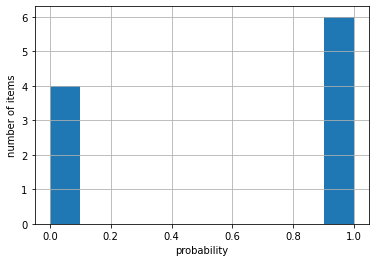

In [33]:
n =int(input("please! Enter the n number = "))
x = np.random.choice([0,1] , size= (n ,1 ) , p = [0.6 , 0.4])
p = np.sum(x)/n
print("P(H) : " , p)
plt.hist( x )
plt.grid()
plt.xlabel('probability')
plt.ylabel('number of items')


# Two fair coin flips produce exactly two heads

In [34]:
# two fair coin
n = int(input("Enter the number of N  please! = "))
x = np.random.choice([0,1] , size= (n ,2 ) )
print("x : \n", x)
y = np.sum(x , axis = 1, keepdims = True)  == 2
p= np.sum(y)/n
print("P(H) : " , p)

Enter the number of N  please! = 10
x : 
 [[1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 1]]
P(H) :  0.3


# Three fair coin flips produce exactly one head

In [35]:
n = int(input("Enter the number of N  please! = "))
x = np.random.choice([0,1] , size= (n ,3 ))
print("x: \n ", x)
y = np.sum(x , axis = 1, keepdims = True)  == 1
p= np.sum(y)/n
print(p)

Enter the number of N  please! = 10
x: 
  [[1 1 1]
 [0 0 1]
 [1 0 1]
 [1 1 0]
 [1 1 1]
 [0 0 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [0 1 0]]
0.2


# Three biased coin flips with P(H) = 0.6 produce exactly ,  unfair one head

In [36]:
n = int(input("Enter the number of N  please! = "))
x = np.random.choice([0,1] , size= (n ,3 ) , p = [0.4,0.6])
print("x : \n",x)
y = np.sum(x , axis = 1, keepdims = True)  == 1
p= np.sum(y)/n
print("P(H) : " ,p)

Enter the number of N  please! = 10
x : 
 [[1 0 0]
 [0 1 1]
 [0 1 1]
 [1 0 0]
 [1 0 0]
 [0 0 0]
 [1 0 1]
 [0 0 0]
 [1 1 0]
 [0 0 1]]
P(H) :  0.4


# Simulate Rolling a fair die  1000  times.

In [37]:
x = np.random.randint(1,7,size = (5,))
print(x)

[4 1 3 5 1]


In [38]:
n = int(input("inter the number of times that you want N = "))
x = np.random.randint(1,7,size = (n,))
y = np.sum(x)
mean = y/n
var1 = (x-mean)**2
print("var : " , var1)
variance = np.sum(var1)/(n-1)
print("variance : " , variance)
stand = variance**(1/2)
print("standard deviation : " , stand)
print("Sample mean:",mean)
print("Sample variance:",variance)
print("Sample standard deviation:",stand)
print("---------the theoretical probability---------")
print(x.mean())
print(x.var(ddof=1))
print(x.std(ddof=1))


inter the number of times that you want N = 1000
var :  [0.256036 6.280036 0.256036 6.280036 6.280036 2.232036 2.268036 0.244036
 2.268036 0.244036 2.268036 6.280036 6.220036 6.280036 0.244036 0.256036
 2.232036 0.244036 2.268036 6.220036 2.268036 2.268036 0.256036 2.268036
 6.220036 6.220036 6.280036 6.220036 0.244036 0.244036 2.232036 0.244036
 6.280036 0.256036 2.232036 0.256036 0.244036 0.244036 2.232036 2.232036
 2.232036 6.280036 2.268036 0.256036 2.268036 0.244036 0.256036 6.280036
 2.232036 0.244036 2.268036 6.280036 2.268036 0.256036 2.232036 0.256036
 6.220036 6.280036 6.220036 0.244036 2.232036 0.256036 2.232036 6.280036
 0.244036 2.268036 2.268036 0.256036 2.232036 2.268036 6.280036 6.220036
 0.244036 6.220036 2.232036 6.220036 6.220036 2.232036 2.268036 2.268036
 2.268036 2.232036 2.268036 0.244036 6.280036 2.268036 6.220036 0.256036
 0.256036 2.232036 0.256036 6.220036 6.220036 2.268036 2.268036 6.280036
 2.232036 2.268036 2.268036 6.280036 6.280036 0.256036 6.220036 6.28

# Data set

In [39]:
df = pd.read_csv('weatherHistory.csv')
temperature = df['Temperature (C)'].to_numpy()
apparant_temp = df['Apparent Temperature (C)'].to_numpy()
humidity = df['Humidity'].to_numpy()
print(temperature)
print(np.shape(temperature))
print(apparant_temp)

[ 9.47222222  9.35555556  9.37777778 ... 22.03888889 21.52222222
 20.43888889]
(96453,)
[ 7.38888889  7.22777778  9.37777778 ... 22.03888889 21.52222222
 20.43888889]


Text(0, 0.5, 'Apparent Temperature (C)')

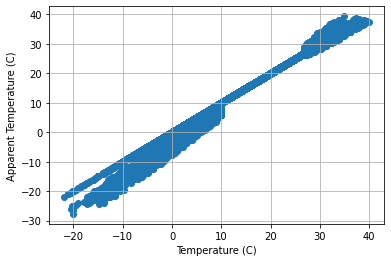

In [40]:
plt.scatter(temperature, apparant_temp)
plt.grid()
plt.xlabel('Temperature (C)')
plt.ylabel('Apparent Temperature (C)')

Text(0, 0.5, 'Temperature (C)')

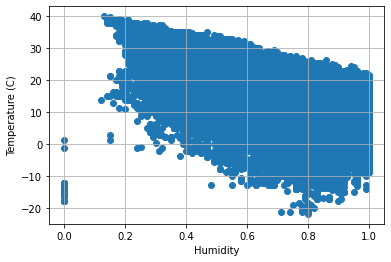

In [41]:
plt.scatter(humidity, temperature)
plt.grid()
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')

In [42]:
#Temperature and Apparent Temperature
mean_TEMP = np.mean(temperature)
mean_Appa = np.mean(apparant_temp)
num = len(temperature)
h=0
for i in range(num):
    h += (temperature[i]-mean_TEMP)*(apparant_temp[i]-mean_Appa)
Covariance =(h)/len(temperature) 
print("Covariance: ",Covariance)
print("---------------------------------------------------")
print("np.cov():")
X=temperature.T
Y=apparant_temp.T
print(np.cov(X,Y))
print("---------------------------------------------------")
l=0
m=0
for i in range(num):
    l += (temperature[i]-mean_TEMP)**2
    m +=(apparant_temp[i]-mean_Appa)**2
l1=(l/(len(temperature)-1))
m1=(m/(len(apparant_temp)-1)) 
print("Correlation Cof:",Covariance/((l1*m1)**(1/2)))
print("---------------------------------------------------")
print("np.corrcoef():")
print(np.corrcoef(X,Y))
    


Covariance:  101.41723170975013
---------------------------------------------------
np.cov():
[[ 91.23203712 101.41828319]
 [101.41828319 114.42254413]]
---------------------------------------------------
Correlation Cof: 0.9926182728732922
---------------------------------------------------
np.corrcoef():
[[1.         0.99262856]
 [0.99262856 1.        ]]


In [43]:
#humidity, temperature)
#Temperature and Humidity
mean_TEMP = np.mean(humidity)
mean_Appa = np.mean(temperature)
num = len(humidity)
h=0
for i in range(num):
    h += (humidity[i]-mean_TEMP)*(temperature[i]-mean_Appa)
Covariance =(h)/len(temperature) 
print("Covariance: ",Covariance)
print("---------------------------------------------------")
print("np.cov():")
X=temperature.T
Y=humidity.T
print(np.cov(X,Y))
print("---------------------------------------------------")
l=0
m=0
for i in range(num):
    l += (humidity[i]-mean_TEMP)**2
    m +=(temperature[i]-mean_Appa)**2
l1=(l/len(humidity))
m1=(m/len(temperature)) 
#print(l1)
#print(m1)
print("Correlation Cof:",Covariance/((l1*m1)**(1/2)))
print("---------------------------------------------------")
print("np.corrcoef():")
print(np.corrcoef(X,Y))

Covariance:  -1.1804495510596085
---------------------------------------------------
np.cov():
[[ 9.12320371e+01 -1.18046179e+00]
 [-1.18046179e+00  3.82095917e-02]]
---------------------------------------------------
Correlation Cof: -0.6322546750263274
---------------------------------------------------
np.corrcoef():
[[ 1.         -0.63225468]
 [-0.63225468  1.        ]]
